Описание датасета  
  
Home Ownership - домовладение  
Annual Income - годовой доход  
Years in current job - количество лет на текущем месте работы  
Tax Liens - налоговые обременения  
Number of Open Accounts - количество открытых счетов  
Years of Credit History - количество лет кредитной истории  
Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)  
Number of Credit Problems - количество проблем с кредитом  
Months since last delinquent - количество месяцев с последней просрочки платежа  
Bankruptcies - банкротства  
Purpose - цель кредита  
Term - срок кредита  
Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)  
Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)  
Monthly Debt - ежемесячный долг  
Credit Score - баллы кредитного рейтинга  
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)  

## Чтение данных


In [585]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV


import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [476]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [477]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [478]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


Построить график распределения целевой переменной. Сделать выводы.  

Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.  

Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.  

In [479]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [480]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [481]:
df_train.columns =df_train.columns.str.lower()
df_train.columns =df_train.columns.str.replace(' ', '_')
df_train.columns

Index(['home_ownership', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default'],
      dtype='object')

In [482]:
df_test.columns =df_test.columns.str.lower()
df_test.columns =df_test.columns.str.replace(' ', '_')
df_test.columns

Index(['home_ownership', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')

In [483]:
df_train[:5]

,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


<AxesSubplot:>

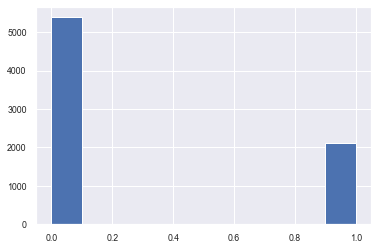

In [484]:
df_train['credit_default'].hist()

тех кто платит кредит гораздо больше

In [485]:
# k = 11
# for i in df_train['years_in_current_job'].unique():
#     df_train.loc[df_train['years_in_current_job'] == i, 'years_in_current_job'] = k
#     k = k - 1
# df_train['years_in_current_job'] = pd.to_numeric(df_train['years_in_current_job'], errors = 'coerce')



Дополнительное задание для работы с курсовым проектом:

(Необязательно выполнять, но очень желательно)

Скачать данные из соревнования. Считать их.

Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

Сравните распределения признаков из train.csv и test.csv

Поизучайте значения на категориальных признаках и попробуйте сократить кол-во уникальных значений

In [486]:
df_train.head()

,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [487]:
df_train.isna().mean()

home_ownership                  0.000000
annual_income                   0.207600
years_in_current_job            0.049467
tax_liens                       0.000000
number_of_open_accounts         0.000000
years_of_credit_history         0.000000
maximum_open_credit             0.000000
number_of_credit_problems       0.000000
months_since_last_delinquent    0.544133
bankruptcies                    0.001867
purpose                         0.000000
term                            0.000000
current_loan_amount             0.000000
current_credit_balance          0.000000
monthly_debt                    0.000000
credit_score                    0.207600
credit_default                  0.000000
dtype: float64

In [488]:
df_test.isna().mean()

home_ownership                  0.0000
annual_income                   0.2052
years_in_current_job            0.0344
tax_liens                       0.0000
number_of_open_accounts         0.0000
years_of_credit_history         0.0000
maximum_open_credit             0.0000
number_of_credit_problems       0.0000
months_since_last_delinquent    0.5432
bankruptcies                    0.0012
purpose                         0.0000
term                            0.0000
current_loan_amount             0.0000
current_credit_balance          0.0000
monthly_debt                    0.0000
credit_score                    0.2052
dtype: float64

## Выделение целевой переменной и групп признаков

In [489]:
TARGET_NAME = 'credit_default'
# BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
# NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

NUM_FEATURE_NAMES = [i for i in df_train.describe(include= 'float64').columns]

CAT_FEATURE_NAMES = [i for i in df_train.describe(include= 'object').columns]

In [490]:
TARGET_NAME = 'credit_default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

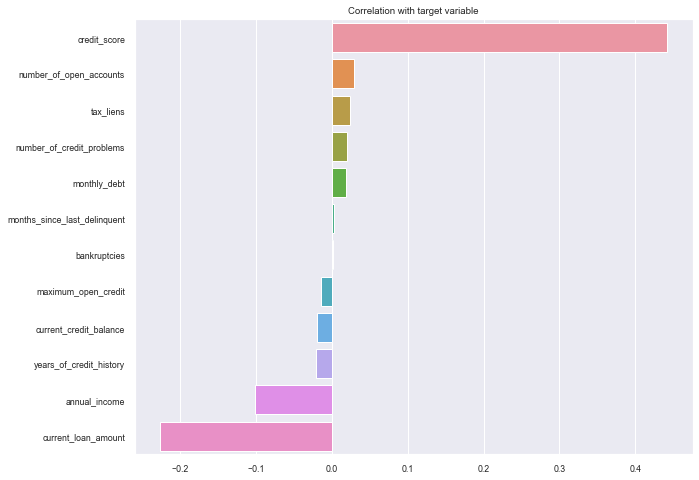

In [491]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

самая хорошая корреляция у 'Credit Score' - баллы кредитного рейтинга и 'Current Loan Amount' - текущая сумма кредита

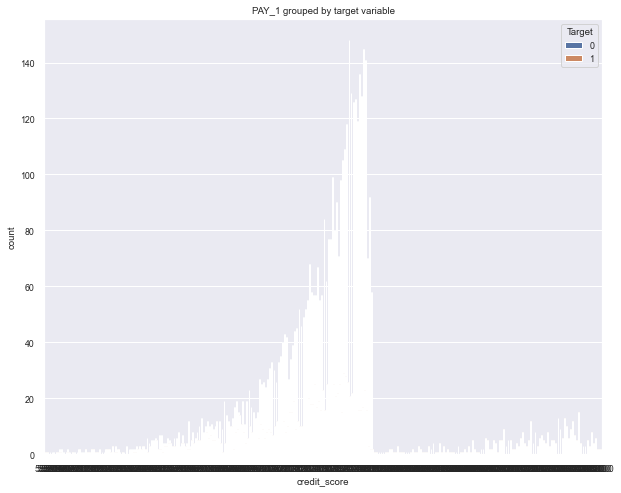

In [492]:
plt.figure(figsize=(10, 8))

sns.countplot(x="credit_score", hue=TARGET_NAME, data=df_train)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## убираю пропуски

annual_income

In [493]:
df_train['annual_income'].fillna(df_train['annual_income'].median(), inplace=True)
df_test['annual_income'].fillna(df_test['annual_income'].median(), inplace=True)

In [494]:
df_train['annual_income'].isna().sum()

0

In [495]:
df_train['annual_income_group'] = pd.cut(df_train['annual_income'], 5)

In [496]:
df_train['annual_income_group'].value_counts()

(154612.253, 2161546.4]    6821
(2161546.4, 4158495.8]      594
(4158495.8, 6155445.2]       61
(6155445.2, 8152394.6]       17
(8152394.6, 10149344.0]       7
Name: annual_income_group, dtype: int64

In [497]:
df_train.groupby('annual_income_group')['credit_default'].agg(['count', 'mean', 'median'])

,count,mean,median
annual_income_group,,,
"(154612.253, 2161546.4]",6821,0.291893,0
"(2161546.4, 4158495.8]",594,0.190236,0
"(4158495.8, 6155445.2]",61,0.098361,0
"(6155445.2, 8152394.6]",17,0.058824,0
"(8152394.6, 10149344.0]",7,0.285714,0


<AxesSubplot:xlabel='annual_income_group'>

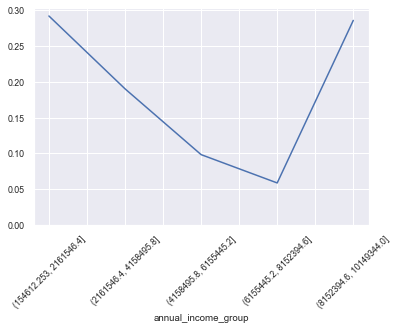

In [498]:
# plt.figure(figsize=(20,10))
df_train.groupby('annual_income_group')['credit_default'].mean().plot(grid=True, ylim=0, rot=45)

years_in_current_job

In [499]:
df_train['years_in_current_job'].isna().sum()

371

In [500]:
df_train['years_in_current_job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: years_in_current_job, dtype: int64

In [501]:
df_train['years_in_current_job']=df_train['years_in_current_job'].fillna('10+ years')
df_test['years_in_current_job']=df_test['years_in_current_job'].fillna('10+ years')

Months since last delinquent

In [502]:
df_train['months_since_last_delinquent'].isna().sum()

4081

In [503]:
df_train['months_since_last_delinquent'].fillna(df_train['months_since_last_delinquent'].median(), inplace=True)
df_test['months_since_last_delinquent'].fillna(df_test['months_since_last_delinquent'].median(), inplace=True)

In [504]:
df_train['months_since_last_delinquent'].value_counts()

32.0     4132
14.0       76
29.0       71
33.0       68
8.0        68
         ... 
84.0        1
86.0        1
91.0        1
118.0       1
92.0        1
Name: months_since_last_delinquent, Length: 89, dtype: int64

In [505]:
df_train['months_since_last_delinquent_group'] = pd.cut(df_train['months_since_last_delinquent'], 5)

In [506]:
df_train.groupby('months_since_last_delinquent_group')['credit_default'].agg(['count', 'mean', 'median'])

,count,mean,median
months_since_last_delinquent_group,,,
"(-0.118, 23.6]",1243,0.280772,0
"(23.6, 47.2]",5313,0.279315,0
"(47.2, 70.8]",668,0.290419,0
"(70.8, 94.4]",275,0.312727,0
"(94.4, 118.0]",1,0.000000,0


<AxesSubplot:xlabel='months_since_last_delinquent_group'>

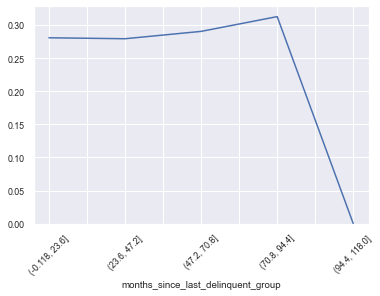

In [507]:
df_train.groupby('months_since_last_delinquent_group')['credit_default'].mean().plot(grid=True, ylim=0, rot=45)

Credit Score

In [508]:
df_train['credit_score'].isna().sum()

1557

In [509]:
df_train['credit_score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
742.0     151
         ... 
629.0       1
606.0       1
6830.0      1
6670.0      1
620.0       1
Name: credit_score, Length: 268, dtype: int64

In [510]:
df_train['credit_score'].fillna(df_train['credit_score'].median(), inplace= True)
df_test['credit_score'].fillna(df_test['credit_score'].median(), inplace= True)

In [511]:
df_train['credit_score'].isna().sum()

0

bankruptcies

In [512]:
df_train['bankruptcies'].isna().sum()

14

In [513]:
df_train['bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64

In [514]:
df_train['bankruptcies'].fillna(df_train['bankruptcies'].median(), inplace=True)
df_test['bankruptcies'].fillna(df_test['bankruptcies'].median(), inplace=True)

## сравнение train test

annual_income
MannwhitneyuResult(statistic=8948146.5, pvalue=0.0003115420629796576)


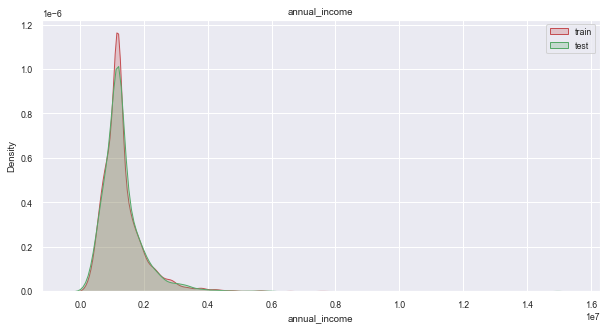

tax_liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


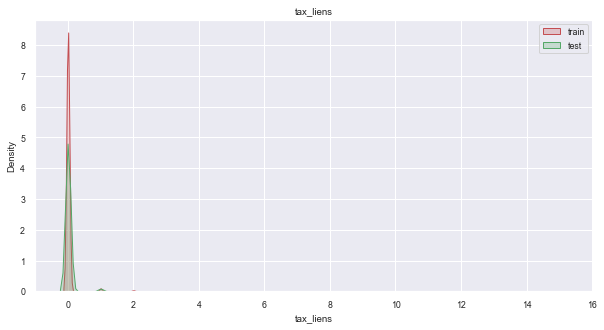

number_of_open_accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


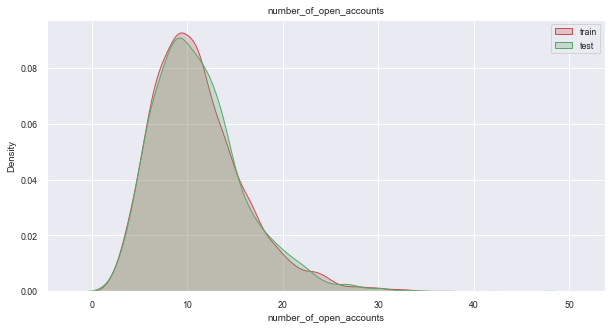

years_of_credit_history
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


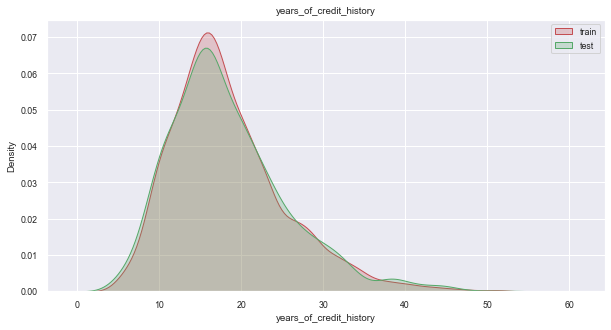

maximum_open_credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


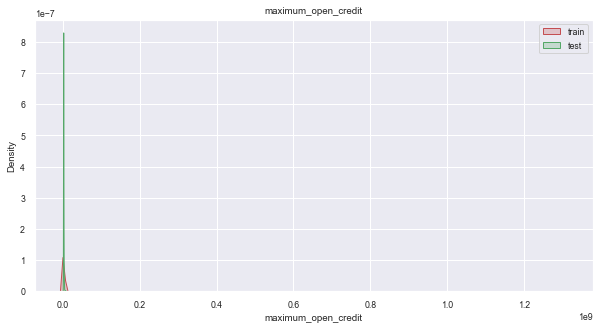

number_of_credit_problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


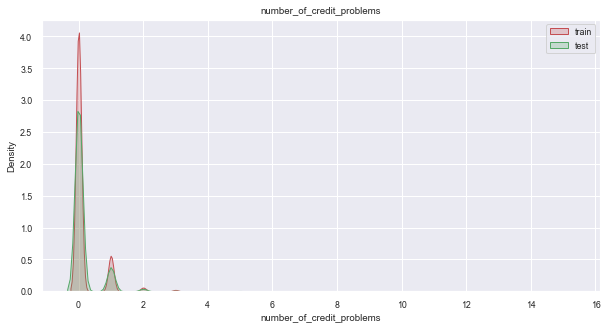

months_since_last_delinquent
MannwhitneyuResult(statistic=6291937.5, pvalue=3.434375297352785e-145)


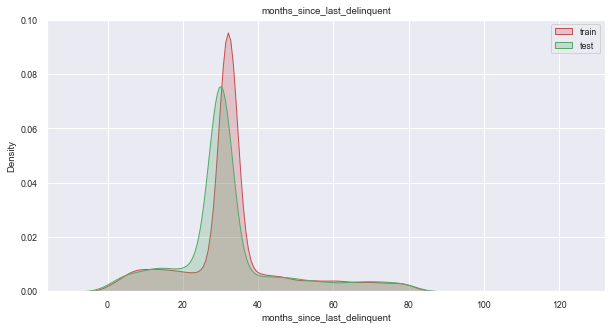

bankruptcies
MannwhitneyuResult(statistic=9260973.0, pvalue=0.04432950519761078)


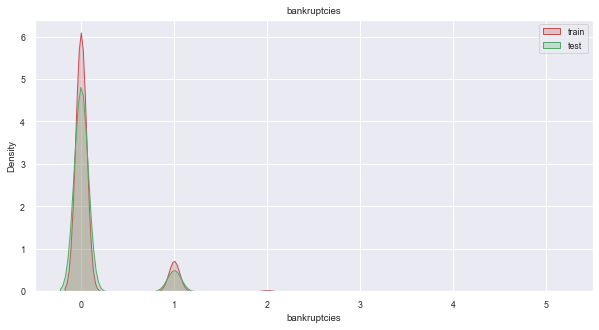

current_loan_amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


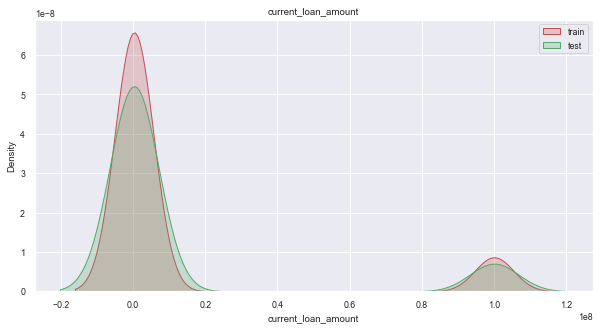

current_credit_balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


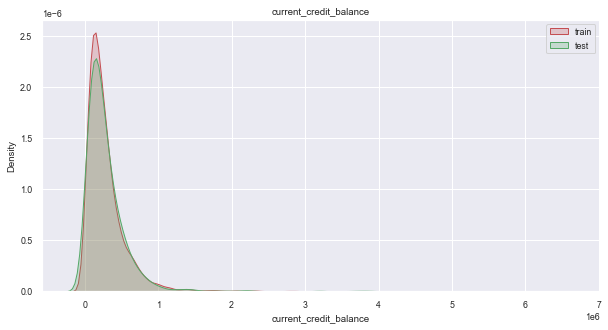

monthly_debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


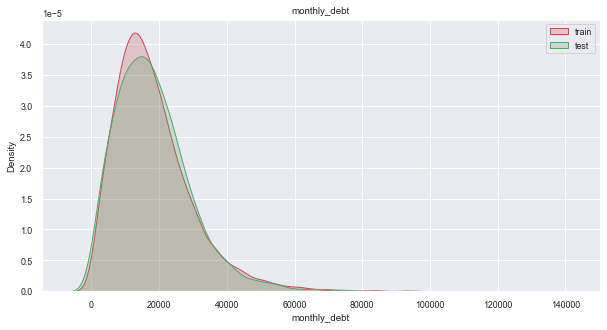

credit_score
MannwhitneyuResult(statistic=9355026.0, pvalue=0.4361860976739489)


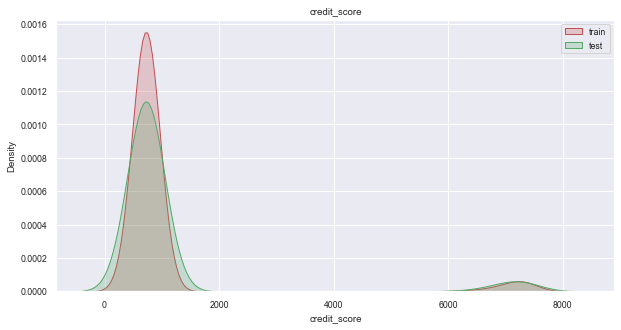

In [515]:
figsize = (10, 5)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df_train[col], shade=True, label='train', color='r')
    sns.kdeplot(df_test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df_train[col], df_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

у всех колонок p_value больше 5%, кроме одного(bankruptcies), в нем 4.4%, я думаю, что train и test похожи

In [516]:
df_train['purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [517]:
def change_pay_1(df):
     
    df_train['purpose'].replace('small business', 'take a trip', inplace=True)
    df_test['purpose'].replace('small business', 'take a trip', inplace=True)
    df_train['purpose'].replace('moving', 'take a trip', inplace=True)
    df_test['purpose'].replace('moving', 'take a trip', inplace=True)
    df_train['purpose'].replace('educational expenses', 'debt consolidation', inplace=True)
    df_test['purpose'].replace('educational expenses', 'debt consolidation', inplace=True)
    df_train['purpose'].replace('medical bills', 'buy house', inplace=True)
    df_test['purpose'].replace('medical bills', 'buy house', inplace=True)

    return df


df_test = change_pay_1(df_test)
df_train = change_pay_1(df_train)

In [518]:
df_train['years_in_current_job'].unique()

array(['10+ years', '8 years', '6 years', '7 years', '5 years', '1 year',
       '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [519]:
def change_pay_2(df):
     
    df_train['years_in_current_job'].replace('1 year', '3 years', inplace=True)
    df_test['years_in_current_job'].replace('1 year', '3 years', inplace=True)
    df_train['years_in_current_job'].replace('3 years', '10+ years', inplace=True)
    df_test['years_in_current_job'].replace('3 years', '10+ years', inplace=True)
    

    return df


df_test = change_pay_2(df_test)
df_train = change_pay_2(df_train)

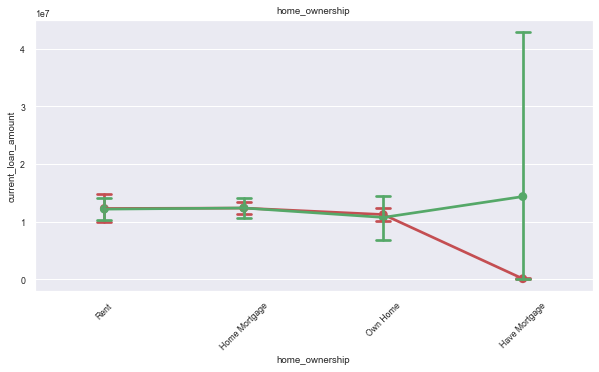

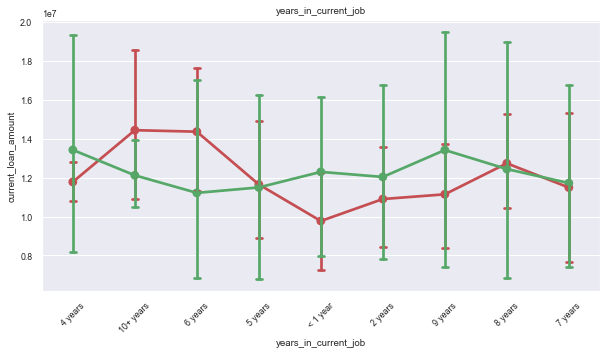

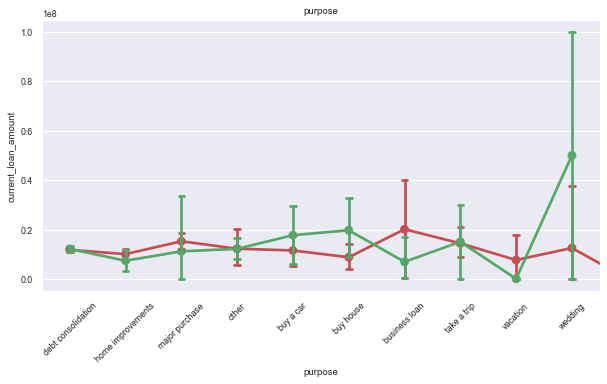

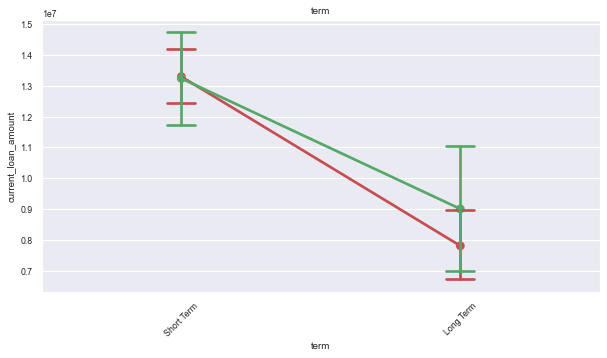

In [520]:
num_feature = 'current_loan_amount'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=df_train, capsize=.1, label='df_train', color='r')
    sns.pointplot(x=col, y=num_feature, data=df_test, capsize=.1, label='df_test', color='g')
    plt.xticks(rotation=45)
    plt.title(col) 
    plt.show()

после небольшой замены категориальных признаков на train и test , они стали лучше совпадать

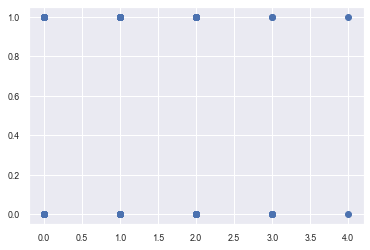

In [521]:
plt.scatter(df_train['bankruptcies'], df_train['credit_default'])

<AxesSubplot:xlabel='credit_default'>

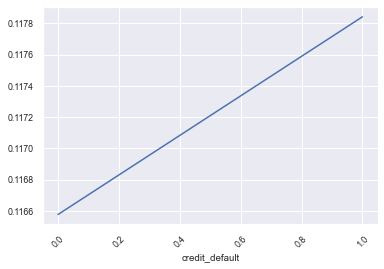

In [522]:
df_train.groupby('credit_default')['bankruptcies'].mean().plot(grid=True, rot=45)

## работы с категориальными признаками

In [523]:
list(set(df_train['purpose'].unique()) - set(df_test['purpose'].unique()))

['renewable energy']

In [524]:
df_train['purpose'].value_counts()

debt consolidation    5954
other                  665
home improvements      412
business loan          129
buy house              105
buy a car               96
take a trip             74
major purchase          40
wedding                 15
vacation                 8
renewable energy         2
Name: purpose, dtype: int64

In [525]:
df_train['purpose'].replace('renewable energy', 'debt consolidation', inplace=True)

In [526]:
train_columns_object= df_train.describe(include= 'object').columns
train_columns_object

Index(['home_ownership', 'years_in_current_job', 'purpose', 'term'], dtype='object')

In [527]:
test_columns_object= df_test.describe(include= 'object').columns
test_columns_object

Index(['home_ownership', 'years_in_current_job', 'purpose', 'term'], dtype='object')

In [528]:
df_train = pd.concat([df_train, pd.get_dummies(df_train[[i for i in train_columns_object]])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test[[i for i in test_columns_object]])], axis=1)

In [529]:
df_train.columns = df_train.columns.str.replace(' ', '_').str.lower()
df_train.columns

Index(['home_ownership', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default', 'annual_income_group',
       'months_since_last_delinquent_group', 'home_ownership_have_mortgage',
       'home_ownership_home_mortgage', 'home_ownership_own_home',
       'home_ownership_rent', 'years_in_current_job_10+_years',
       'years_in_current_job_2_years', 'years_in_current_job_4_years',
       'years_in_current_job_5_years', 'years_in_current_job_6_years',
       'years_in_current_job_7_years', 'years_in_current_job_8_years',
       'years_in_current_job_9_years', 'years_in_current_job_<_1_year',
       'purpose_business_loan', 'purpose_buy_a_car', 'purpose_buy_house',
       'purpose_debt_cons

In [530]:
df_test.columns = df_test.columns.str.replace(' ', '_').str.lower()
df_test.columns

Index(['home_ownership', 'annual_income', 'years_in_current_job', 'tax_liens',
       'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'home_ownership_have_mortgage',
       'home_ownership_home_mortgage', 'home_ownership_own_home',
       'home_ownership_rent', 'years_in_current_job_10+_years',
       'years_in_current_job_2_years', 'years_in_current_job_4_years',
       'years_in_current_job_5_years', 'years_in_current_job_6_years',
       'years_in_current_job_7_years', 'years_in_current_job_8_years',
       'years_in_current_job_9_years', 'years_in_current_job_<_1_year',
       'purpose_business_loan', 'purpose_buy_a_car', 'purpose_buy_house',
       'purpose_debt_consolidation', 'purpose_home_improvements',
       'purpose_major_purchase', 'purpose_oth

In [531]:
train_columns_object

Index(['home_ownership', 'years_in_current_job', 'purpose', 'term'], dtype='object')

In [532]:
df_train['home_ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: home_ownership, dtype: int64

In [533]:
df_train.drop('home_ownership_have_mortgage', inplace=True, axis=1)
df_test.drop('home_ownership_have_mortgage', inplace=True, axis=1)

In [534]:
df_train['years_in_current_job'].value_counts()

10+ years    3827
2 years       705
< 1 year      563
5 years       516
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: years_in_current_job, dtype: int64

In [535]:
df_train.drop('years_in_current_job_9_years', inplace=True, axis=1)
df_test.drop('years_in_current_job_9_years', inplace=True, axis=1)

In [536]:
df_train['purpose'].value_counts()

debt consolidation    5956
other                  665
home improvements      412
business loan          129
buy house              105
buy a car               96
take a trip             74
major purchase          40
wedding                 15
vacation                 8
Name: purpose, dtype: int64

In [537]:
df_train.drop('purpose_vacation', inplace=True, axis=1)
df_test.drop('purpose_vacation', inplace=True, axis=1)

In [538]:
df_train['term'].value_counts()

Short Term    5556
Long Term     1944
Name: term, dtype: int64

In [539]:
df_train.drop('term_long_term', inplace=True, axis=1)
df_test.drop('term_long_term', inplace=True, axis=1)

In [540]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [541]:
df_train['credit_default'].value_counts()

0    5387
1    2113
Name: credit_default, dtype: int64

In [542]:
cat_group= df_train.describe(include='category')

In [543]:
cat_group

,annual_income_group,months_since_last_delinquent_group
count,7500,7500
unique,5,5
top,"(154612.253, 2161546.4]","(23.6, 47.2]"
freq,6821,5313


In [544]:
df_train= df_train.drop(cat_group, axis=1)


In [ ]:
cat_atr = df_train.describe(include= 'object')

In [593]:
X.describe(include= 'object')

,home_ownership,years_in_current_job,purpose,term
count,7500,7500,7500,7500
unique,4,9,10,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3637,3827,5956,5556


# разбиение данных на train, test

In [545]:
# df_train_not_cat= df_train.drop(CAT_FEATURE_NAMES, axis=1)
# df_test_not_cat= df_test.drop(CAT_FEATURE_NAMES, axis=1)

In [590]:
X = df_train.drop('credit_default', axis=1)
y = df_train['credit_default']

# X = df_train_not_cat.drop('credit_default', axis=1)
# y = df_train_not_cat['credit_default']
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True,stratify=df_train['credit_default'], test_size=0.30, random_state=21)

In [547]:
y_train.shape

(5250,)

In [548]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: credit_default, dtype: int64

# обучение модели

In [563]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

RandomForestClassifier

In [549]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [577]:
df_train_not_cat = df_train.drop(cat_atr, axis=1)
X_x = df_train_not_cat.drop('credit_default', axis=1)
y_y = df_train_not_cat['credit_default']
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X_x,y_y, shuffle=True, test_size=0.30, random_state=21)

In [606]:
# model_forest = RandomForestRegressor()
model_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 24, random_state = 42)
model_forest.fit(Xx_train, yy_train)


RandomForestClassifier(max_depth=24, n_estimators=1000, random_state=42)

In [607]:
y_pred = model_forest.predict(Xx_test)

In [608]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(yy_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(yy_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(yy_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1559   57]
 [ 457  177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1616
           1       0.76      0.28      0.41       634

    accuracy                           0.77      2250
   macro avg       0.76      0.62      0.63      2250
weighted avg       0.77      0.77      0.73      2250

Accuracy: 0.7715555555555556


CatBoost

In [553]:
import catboost as catb

In [566]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train, cat_features=cat_atr, plot= True)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3771
           1       0.97      0.51      0.67      1479

    accuracy                           0.86      5250
   macro avg       0.90      0.75      0.79      5250
weighted avg       0.87      0.86      0.84      5250

TEST

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1616
           1       0.71      0.31      0.43       634

    accuracy                           0.77      2250
   macro avg       0.74      0.63      0.64      2250
weighted avg       0.76      0.77      0.74      2250

CONFUSION MATRIX

col_0              0    1
credit_default           
0               1535   81
1                437  197


обучение с подбором гиперпараметров

In [582]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

In [583]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

In [586]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [594]:
X = X.drop(cat_atr, axis=1)

In [595]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 43.4 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000023610473E48>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='f1')

In [596]:
rs.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [597]:
rs.best_score_

0.5425127611052705

# ДЗ

Задача 1
Аналогия со следующеми задачеми
Макро. Это основные цели веб-сайта. Примером могут послужить объем продаж, звонок в компанию, запрос прайса, использование тестового периода.
Микро. Они представляют собой промежуточные шаги на пути к основной цели. В качестве примеров можно привести подписку на рассылку, загрузка руководства пользователя (и др. вид лидогенерации), переход на определенную страницу и т.п.
weighted - возвращает среднее значение с учетом пропорции для каждого параметра в наборе данных. может являтся оптимальным значением для данной аналогии


Задача 2
lightgbm использует новую технику односторонней выборки на основе градиента (GOSS) для фильтрации экземпляров данных для нахождения значения разделения, в то время как XGBoost использует предварительно отсортированный алгоритм и алгоритм на основе гистограммы для вычисления наилучшего разделения

CatBoost обладает гибкостью, позволяя задавать индексы категориальных столбцов, чтобы его можно было кодировать как кодирование в одно касание с использованием one_hot_max_size (используйте кодирование в одно касание для всех функций с числом различных значений, меньшим или равным данному значению параметра).

Поэтому CatBoost работает хорошо только тогда, когда в данных есть категориальные переменные, и мы должным образом настроили их.

XGBoost точность близка к CatBoost Однако единственная проблема с XGBoost заключается в том, что он работает слишком долго. 

Light GBM работает хуже по скорости и точности поскольку использует модифицированное среднее кодирование для категориальных данных
